Evaluation Project - 6

# Loan Application Status Prediction

### Problem Statement:

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc.   

Independent Variables:  

-  Loan_ID  

- Gender  

- Married  

- Dependents  

- Education  

- Self_Employed  

- ApplicantIncome  

- CoapplicantIncome  

- Loan_Amount  

- Loan_Amount_Term  

- Credit History  

- Property_Area  

Dependent Variable (Target Variable):

- Loan_Status  

You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset.   

In [1]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Dataset
df_la=pd.read_csv("Loan_Application_Prediction.csv")
df_la

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
# First 10 rows
df_la.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [4]:
# Last 10 rows
df_la.tail(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
604,LP002959,Female,Yes,1,Graduate,No,12000,0.0,496.0,360.0,1.0,Semiurban,Y
605,LP002960,Male,Yes,0,Not Graduate,No,2400,3800.0,NaN,180.0,1.0,Urban,N
606,LP002961,Male,Yes,1,Graduate,No,3400,2500.0,173.0,360.0,1.0,Semiurban,Y
607,LP002964,Male,Yes,2,Not Graduate,No,3987,1411.0,157.0,360.0,1.0,Rural,Y
608,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [5]:
# Sample
df_la.sample(4)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
194,LP001664,Male,No,0,Graduate,No,4191,0.0,120.0,360.0,1.0,Rural,Y
434,LP002390,Male,No,0,Graduate,No,3750,0.0,100.0,360.0,1.0,Urban,Y
579,LP002888,Male,No,0,Graduate,NaN,3182,2917.0,161.0,360.0,1.0,Urban,Y
588,LP002925,NaN,No,0,Graduate,No,4750,0.0,94.0,360.0,1.0,Semiurban,Y


In [6]:
df_la.shape

(614, 13)

This dataset contains `614` rows and `13` columns.

# Preprocessing & EDA

In [7]:
# Column Names
df_la.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [8]:
df_la.shape

(614, 13)

In [9]:
# Column Data Types
df_la.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

We can see that most of the datatypes are object  datatypes and a few integer & float datatypes.

In [10]:
# Checking for null values
df_la.isnull()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,False,False,False,False,False,False,False,False,False,False,False,False,False
610,False,False,False,False,False,False,False,False,False,False,False,False,False
611,False,False,False,False,False,False,False,False,False,False,False,False,False
612,False,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
# Sum of null values
df_la.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

We can see null values present in `Gender, Married, Dependents, Self_Employed,LoanAmount, Loan_Amount_Term` & `Credit_History`.

<AxesSubplot:>

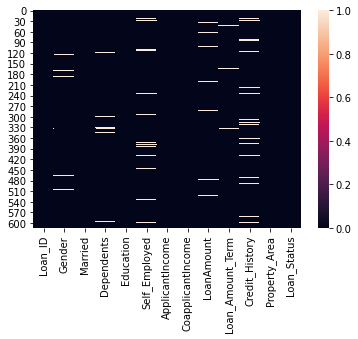

In [12]:
# Visualizing the null values
sns.heatmap(df_la.isnull())

# Treating the Null values

Since Gender, Married, Dependents, Self_Employed,Loan_Amount_Term & Credit_History are categorical columns,we shall replace the null values in these columns with the `mode`of the respective columns.

In [13]:
# Modes of categorical columns
print("The mode of Gender is:",df_la["Gender"].mode())
print("The mode of Married is:",df_la["Married"].mode())
print("The mode of Dependents is:",df_la["Dependents"].mode())
print("The mode of  Self_Employed  is:",df_la["Self_Employed"].mode())
print("The mode of Loan_Amount_Term is:",df_la["Loan_Amount_Term"].mode())
print("The mode of Credit_History  is:",df_la["Credit_History"].mode())

The mode of Gender is: 0    Male
dtype: object
The mode of Married is: 0    Yes
dtype: object
The mode of Dependents is: 0    0
dtype: object
The mode of  Self_Employed  is: 0    No
dtype: object
The mode of Loan_Amount_Term is: 0    360.0
dtype: float64
The mode of Credit_History  is: 0    1.0
dtype: float64


In [14]:
# Replacing null values in categorical columns
df_la["Gender"] = df_la["Gender"].fillna(df_la["Gender"].mode()[0])
df_la["Married"] = df_la["Married"].fillna(df_la["Married"].mode()[0])
df_la["Dependents"] = df_la["Dependents"].fillna(df_la["Dependents"].mode()[0])
df_la["Self_Employed"] = df_la["Self_Employed"].fillna(df_la["Self_Employed"].mode()[0])
df_la["Married"] = df_la["Married"].fillna(df_la["Married"].mode()[0])
df_la["Credit_History"] = df_la["Credit_History"].fillna(df_la["Credit_History"].mode()[0])
df_la["Loan_Amount_Term"] = df_la["Loan_Amount_Term"].fillna(df_la["Loan_Amount_Term"].mode()[0])

Since LoanAmount column is a numerical column we shall replace the null values with `median` of this column.

In [15]:
# Median of numerical column
print("The median of LoanAmount is:",df_la["LoanAmount"].median())

The median of LoanAmount is: 128.0


In [16]:
# Filling null values in LoanAmount by its median value
df_la["LoanAmount"] = df_la["LoanAmount"].fillna(df_la["LoanAmount"].median())

In [17]:
df_la.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<AxesSubplot:>

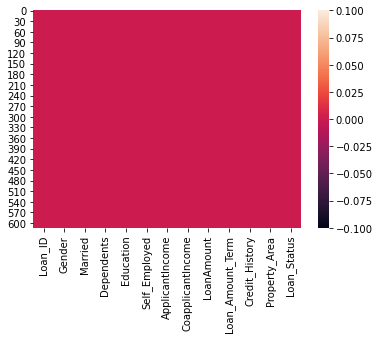

In [18]:
# Visualizing the null values
sns.heatmap(df_la.isnull())

We have treated all the null values.

In [19]:
df_la.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [20]:
# Mean of our target variable 'attrition'
df_la.groupby('Loan_Status').mean()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Loan_Status,,,,,
N,5446.078125,1877.807292,149.890625,344.56250,0.572917
Y,5384.068720,1504.516398,143.869668,341.43128,0.983412


In [21]:
# Value counts of each column.
for i in df_la.columns:
        print(df_la[i].value_counts())
        print('-----------------------------------------------------')

LP002314    1
LP002234    1
LP002531    1
LP001974    1
LP002683    1
           ..
LP001900    1
LP001014    1
LP001046    1
LP002472    1
LP001736    1
Name: Loan_ID, Length: 614, dtype: int64
-----------------------------------------------------
Male      502
Female    112
Name: Gender, dtype: int64
-----------------------------------------------------
Yes    401
No     213
Name: Married, dtype: int64
-----------------------------------------------------
0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64
-----------------------------------------------------
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
-----------------------------------------------------
No     532
Yes     82
Name: Self_Employed, dtype: int64
-----------------------------------------------------
2500    9
6000    6
2600    6
4583    6
4166    5
       ..
5503    1
3450    1
2425    1
2423    1
4095    1
Name: ApplicantIncome, Length: 505, dtype: int64
--------------------

The column `Loan_ID` is the unique ID given to the applicants also it has no significane in the prediction so we shall drop this column.

In [22]:
# Removing unwanted column
df_la.drop("Loan_ID",axis=1,inplace=True)

In [23]:
df_la.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [24]:
# Unique values
df_la.nunique()

Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [25]:
df_la["Loan_Status"].unique()

array(['Y', 'N'], dtype=object)

In [26]:
df_la['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [27]:
#Checking for any empty observation in target column
df_la.loc[df_la['Loan_Status'] == " "]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


No empty observations.

# Data Visualization

In [28]:
df_la.nunique()

Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

# UniVariate Analysis

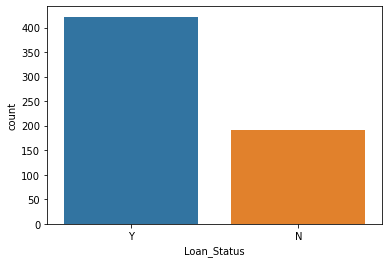

In [29]:
sns.countplot(df_la['Loan_Status'])
plt.show()

Male      502
Female    112
Name: Gender, dtype: int64


<AxesSubplot:ylabel='Gender'>

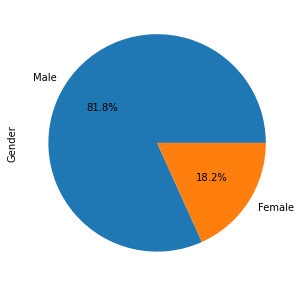

In [30]:
plt.figure(figsize=(10,5))
print(df_la['Gender'].value_counts())
df_la['Gender'].value_counts().plot.pie(autopct='%1.1f%%')

Yes    401
No     213
Name: Married, dtype: int64


<AxesSubplot:ylabel='Married'>

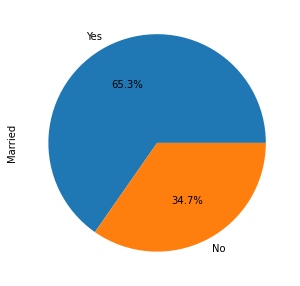

In [31]:
plt.figure(figsize=(10,5))
print(df_la['Married'].value_counts())
df_la['Married'].value_counts().plot.pie(autopct='%1.1f%%')

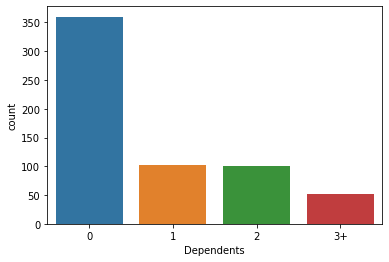

In [32]:
sns.countplot(df_la['Dependents'])
plt.show()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


<AxesSubplot:ylabel='Education'>

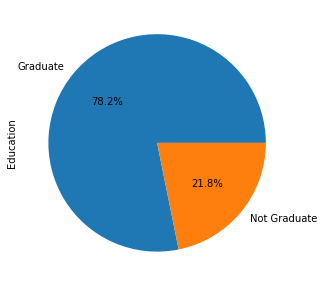

In [33]:
plt.figure(figsize=(10,5))
print(df_la['Education'].value_counts())
df_la['Education'].value_counts().plot.pie(autopct='%1.1f%%')

No     532
Yes     82
Name: Self_Employed, dtype: int64


<AxesSubplot:ylabel='Self_Employed'>

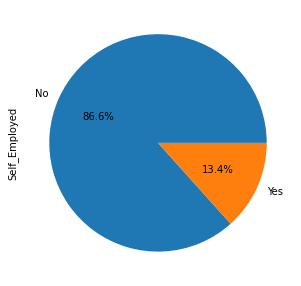

In [34]:
plt.figure(figsize=(10,5))
print(df_la['Self_Employed'].value_counts())
df_la['Self_Employed'].value_counts().plot.pie(autopct='%1.1f%%')

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Count'>

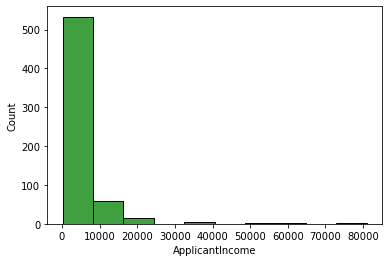

In [35]:
sns.histplot(data=df_la,x="ApplicantIncome",bins=10,color='green')

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Count'>

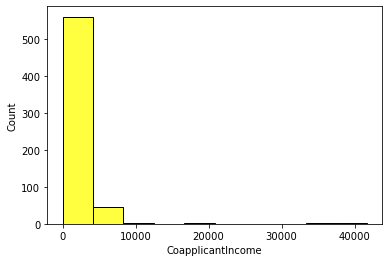

In [36]:
sns.histplot(data=df_la,x="CoapplicantIncome",bins=10,color='yellow')

<AxesSubplot:xlabel='LoanAmount', ylabel='Count'>

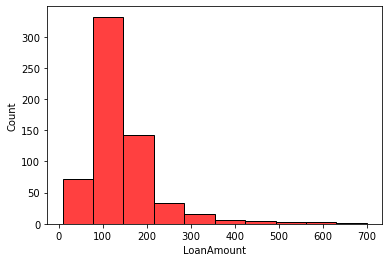

In [37]:
sns.histplot(data=df_la,x="LoanAmount",bins=10,color='red')

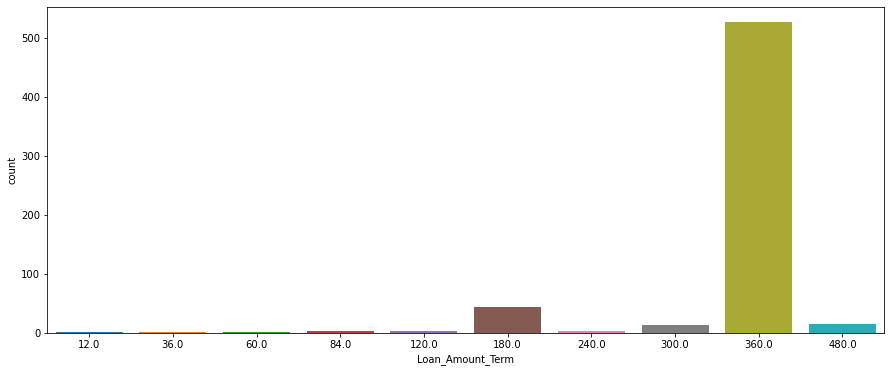

In [38]:
plt.figure(figsize=(15,6))
sns.countplot(df_la['Loan_Amount_Term'])
plt.show()

1.0    525
0.0     89
Name: Credit_History, dtype: int64


<AxesSubplot:ylabel='Credit_History'>

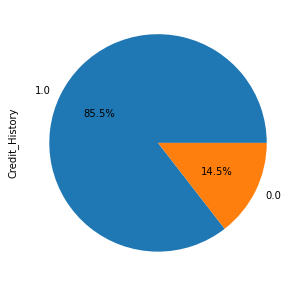

In [39]:
plt.figure(figsize=(10,5))
print(df_la['Credit_History'].value_counts())
df_la['Credit_History'].value_counts().plot.pie(autopct='%1.1f%%')

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


<AxesSubplot:ylabel='Property_Area'>

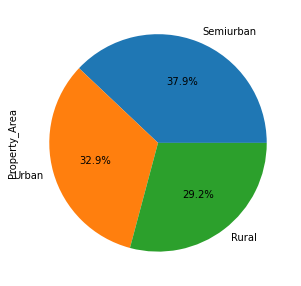

In [40]:
plt.figure(figsize=(10,5))
print(df_la['Property_Area'].value_counts())
df_la['Property_Area'].value_counts().plot.pie(autopct='%1.1f%%')

# Bi-Variate Analysis

<AxesSubplot:xlabel='Gender', ylabel='count'>

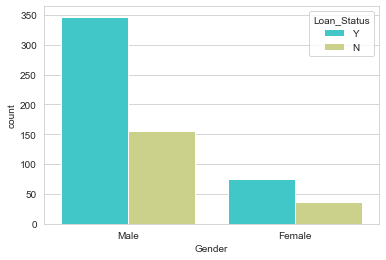

In [41]:
sns.set_style('whitegrid')
sns.countplot(x='Gender',hue='Loan_Status',data=df_la,palette='rainbow')

<AxesSubplot:xlabel='Married', ylabel='count'>

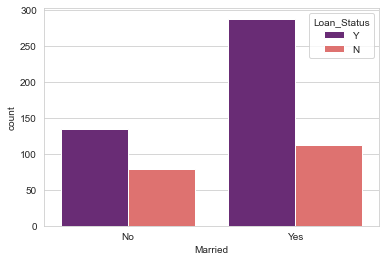

In [42]:
sns.set_style('whitegrid')
sns.countplot(x='Married',hue='Loan_Status',data=df_la,palette='magma')

<AxesSubplot:xlabel='Dependents', ylabel='count'>

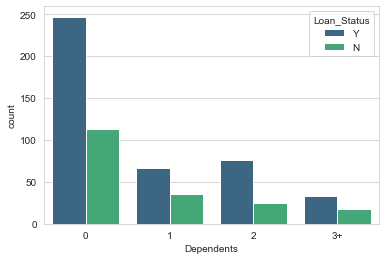

In [43]:
sns.set_style('whitegrid')
sns.countplot(x='Dependents',hue='Loan_Status',data=df_la,palette='viridis')

<AxesSubplot:xlabel='Education', ylabel='count'>

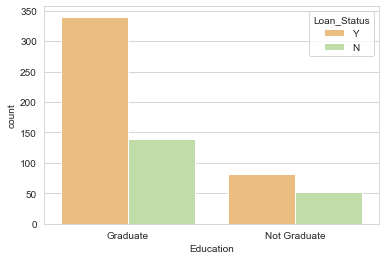

In [44]:
sns.set_style('whitegrid')
sns.countplot(x='Education',hue='Loan_Status',data=df_la,palette='Spectral')

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

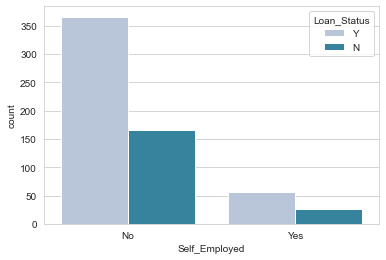

In [45]:
sns.set_style('whitegrid')
sns.countplot(x='Self_Employed',hue='Loan_Status',data=df_la,palette='PuBuGn')

<AxesSubplot:title={'center':'Comparision ApplicantIncome and CoapplicantIncome'}, xlabel='ApplicantIncome', ylabel='CoapplicantIncome'>

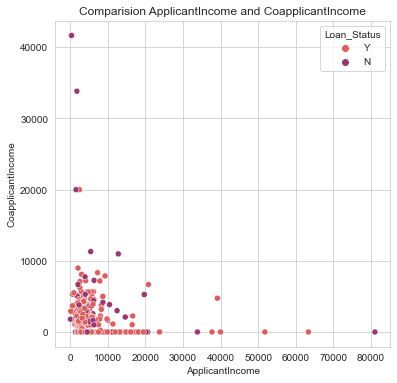

In [46]:
plt.figure(figsize=[6,6])
plt.title('Comparision ApplicantIncome and CoapplicantIncome')
sns.scatterplot(df_la['ApplicantIncome'],df_la['CoapplicantIncome'],hue=df_la["Loan_Status"],palette='flare')

<AxesSubplot:title={'center':'Comparision LoanAmount and Loan_Amount_Term'}, xlabel='LoanAmount', ylabel='Loan_Amount_Term'>

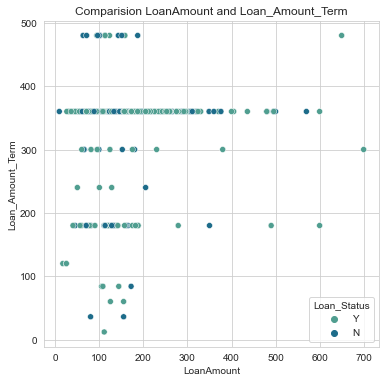

In [47]:
plt.figure(figsize=[6,6])
plt.title('Comparision LoanAmount and Loan_Amount_Term')
sns.scatterplot(df_la['LoanAmount'],df_la['Loan_Amount_Term'],hue=df_la["Loan_Status"],palette='crest')

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

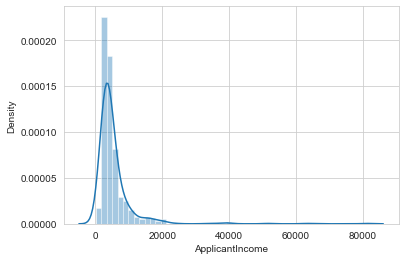

In [48]:
sns.distplot(df_la['ApplicantIncome'])

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

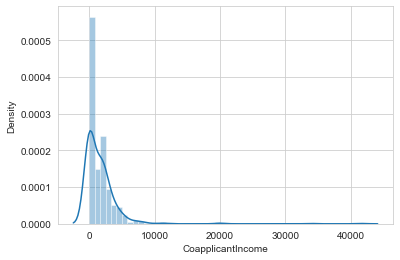

In [49]:
sns.distplot(df_la['CoapplicantIncome'])

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

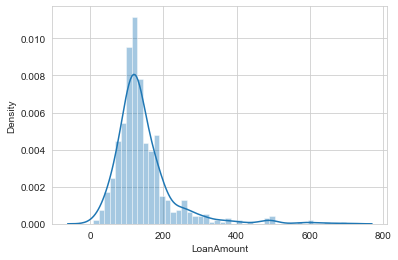

In [50]:
sns.distplot(df_la['LoanAmount'])

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

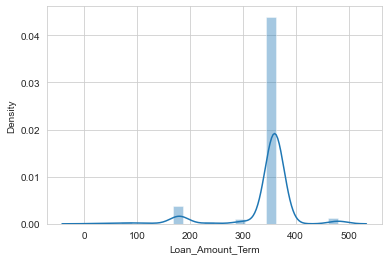

In [51]:
sns.distplot(df_la['Loan_Amount_Term'])

<AxesSubplot:xlabel='Credit_History', ylabel='Density'>

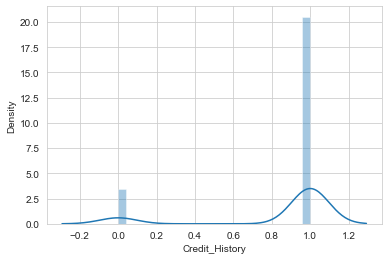

In [52]:
sns.distplot(df_la['Credit_History'])

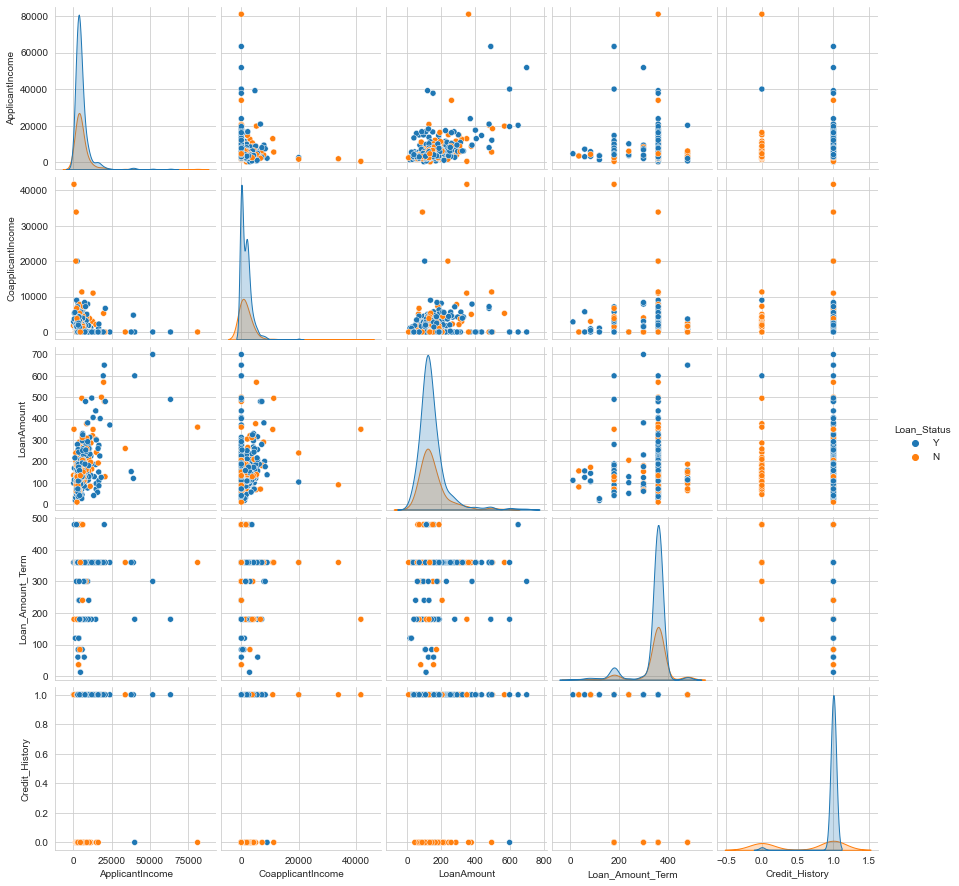

In [53]:
sns.pairplot(df_la,hue="Loan_Status")

# Encoding the Data Frame

In [54]:
df_la.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [55]:
df_la.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

We shall use Label Encoder to encode the data for model building.

In [56]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [57]:
df_la['Gender'] = le.fit_transform(df_la['Gender'])
df_la['Married'] = le.fit_transform(df_la['Married'])
df_la['Dependents'] = le.fit_transform(df_la['Dependents'])
df_la['Education'] = le.fit_transform(df_la['Education'])
df_la['Self_Employed'] = le.fit_transform(df_la['Self_Employed'])
df_la['Property_Area'] = le.fit_transform(df_la['Property_Area'])
df_la['Loan_Status'] = le.fit_transform(df_la['Loan_Status'])

In [58]:
df_la

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


# Outliers

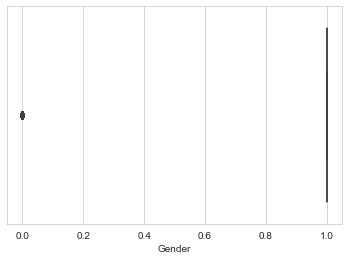

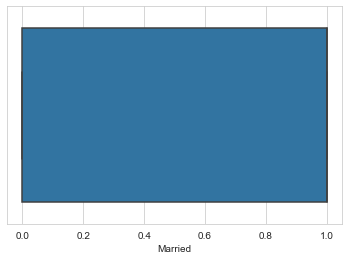

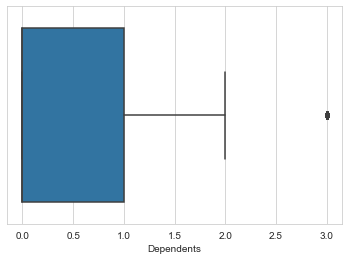

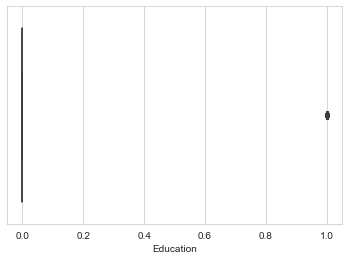

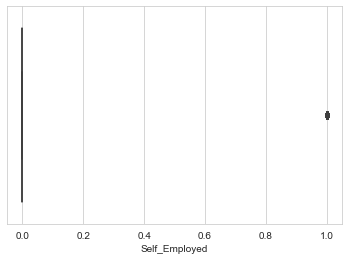

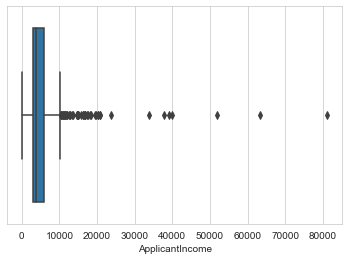

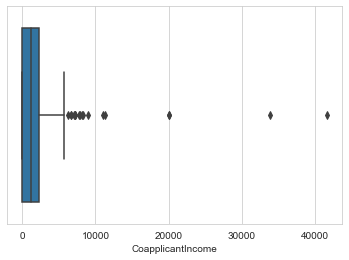

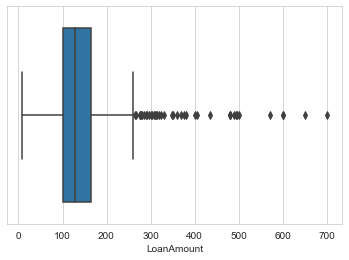

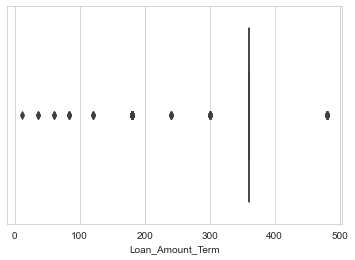

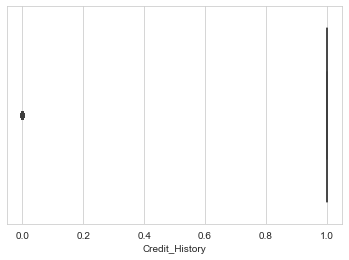

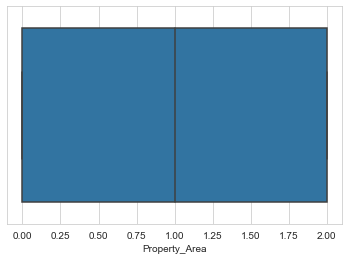

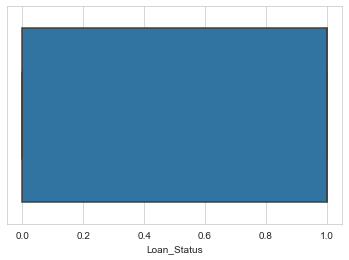

In [59]:
for i in df_la.columns:
    sns.boxplot(df_la[i])
    plt.show()

Gender                  AxesSubplot(0.125,0.536818;0.0596154x0.343182)
Married              AxesSubplot(0.196538,0.536818;0.0596154x0.343182)
Dependents           AxesSubplot(0.268077,0.536818;0.0596154x0.343182)
Education            AxesSubplot(0.339615,0.536818;0.0596154x0.343182)
Self_Employed        AxesSubplot(0.411154,0.536818;0.0596154x0.343182)
ApplicantIncome      AxesSubplot(0.482692,0.536818;0.0596154x0.343182)
CoapplicantIncome    AxesSubplot(0.554231,0.536818;0.0596154x0.343182)
LoanAmount           AxesSubplot(0.625769,0.536818;0.0596154x0.343182)
Loan_Amount_Term     AxesSubplot(0.697308,0.536818;0.0596154x0.343182)
Credit_History       AxesSubplot(0.768846,0.536818;0.0596154x0.343182)
Property_Area        AxesSubplot(0.840385,0.536818;0.0596154x0.343182)
Loan_Status                AxesSubplot(0.125,0.125;0.0596154x0.343182)
dtype: object

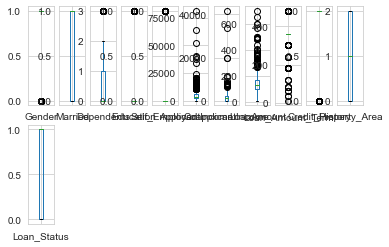

In [60]:
df_la.plot(kind='box',subplots=True,layout=(2,11))

We can see outliers present in `Gender, Dependents, Education, Self_Employed, ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term` & `Credit_History`.

# Removing Outliers

We shall remove the outliers present in the dataset using Z-Score Method.

In [61]:
df_outliers=df_la[["Gender", "Dependents", "Education","Self_Employed","ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term","Credit_History"]]

In [62]:
from scipy.stats import zscore

z=np.abs(zscore(df_outliers))
df_new_la=df_la[(z<3).all(axis=1)]
df_new_la

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [63]:
df_new_la.shape

(577, 12)

In [64]:
df_la.shape

(614, 12)

In [65]:
Data_loss=((614-577)/614)*100
Data_loss

6.026058631921824

The data loss after z-score is `6.02 %`.

# Skewness

In [66]:
df_new_la.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.151525
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

We see high levels of skewness in most of the columns.

In [67]:
df_skew=["Gender","Married","Dependents","Education","Self_Employed","ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term","Credit_History"]

We shall use Power Transformer to remove skewness.

In [68]:
from sklearn.preprocessing import PowerTransformer
scal = PowerTransformer(method='yeo-johnson')

In [69]:
df_new_la[df_skew] = scal.fit_transform(df_new_la[df_skew].values)

In [70]:
df_new_la[df_skew].skew()

Gender              -1.622920
Married             -0.630211
Dependents           0.478360
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      0.027981
CoapplicantIncome   -0.191876
LoanAmount           0.048425
Loan_Amount_Term     0.727533
Credit_History      -1.976043
dtype: float64

In [71]:
df_new_la

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.477137,-1.362511,-0.809243,-0.541961,-0.380580,0.681780,-1.122446,0.000771,0.130788,0.418513,2,1
1,0.477137,0.733939,0.902869,-0.541961,-0.380580,0.234783,0.744117,0.000771,0.130788,0.418513,0,0
2,0.477137,0.733939,-0.809243,-0.541961,2.627567,-0.527201,-1.122446,-1.437336,0.130788,0.418513,2,1
3,0.477137,0.733939,-0.809243,1.845150,-0.380580,-0.791972,0.895786,-0.153545,0.130788,0.418513,2,1
4,0.477137,-1.362511,-0.809243,-0.541961,-0.380580,0.728848,-1.122446,0.238260,0.130788,0.418513,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,-2.095835,-1.362511,-0.809243,-0.541961,-0.380580,-0.587375,-1.122446,-1.293791,0.130788,0.418513,0,1
610,0.477137,0.733939,1.533596,-0.541961,-0.380580,0.035386,-1.122446,-2.332692,-2.562700,0.418513,0,1
611,0.477137,0.733939,0.902869,-0.541961,-0.380580,1.281658,0.173344,1.845015,0.130788,0.418513,2,1
612,0.477137,0.733939,1.344671,-0.541961,-0.380580,1.164426,-1.122446,0.976055,0.130788,0.418513,2,1


In [72]:
df_new_la[np.abs(df_new_la)>0.25].all()

Gender               True
Married              True
Dependents           True
Education            True
Self_Employed        True
ApplicantIncome      True
CoapplicantIncome    True
LoanAmount           True
Loan_Amount_Term     True
Credit_History       True
Property_Area        True
Loan_Status          True
dtype: bool

Skewness is removed.

# Correlation

In [73]:
df_new_la.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.378997,0.183471,0.045696,-0.006207,0.058590,0.234551,0.172146,-0.098370,0.013172,-0.026340,0.017408
Married,0.378997,1.000000,0.349618,0.024817,-0.015779,-0.024783,0.335820,0.181878,-0.128399,0.019308,0.010595,0.089026
Dependents,0.183471,0.349618,1.000000,0.059728,0.069648,0.108178,0.023606,0.135297,-0.095181,-0.015924,0.040716,0.018517
Education,0.045696,0.024817,0.059728,1.000000,-0.007139,-0.176074,0.049739,-0.128715,-0.062494,-0.075217,-0.068596,-0.092658
Self_Employed,-0.006207,-0.015779,0.069648,-0.007139,1.000000,0.212260,-0.087338,0.117218,-0.052033,-0.016390,-0.028253,-0.026525
ApplicantIncome,0.058590,-0.024783,0.108178,-0.176074,0.212260,1.000000,-0.360946,0.432154,-0.089402,0.028825,-0.011364,-0.002484
CoapplicantIncome,0.234551,0.335820,0.023606,0.049739,-0.087338,-0.360946,1.000000,0.200081,-0.000281,0.006564,-0.074476,0.079344
LoanAmount,0.172146,0.181878,0.135297,-0.128715,0.117218,0.432154,0.200081,1.000000,0.021702,-0.003626,-0.098090,-0.023609
Loan_Amount_Term,-0.098370,-0.128399,-0.095181,-0.062494,-0.052033,-0.089402,-0.000281,0.021702,1.000000,-0.000146,-0.029931,-0.056610
Credit_History,0.013172,0.019308,-0.015924,-0.075217,-0.016390,0.028825,0.006564,-0.003626,-0.000146,1.000000,-0.008121,0.560936


In [74]:
df_new_la.corr()['Loan_Status'].sort_values(ascending=False)

Loan_Status          1.000000
Credit_History       0.560936
Married              0.089026
CoapplicantIncome    0.079344
Property_Area        0.026507
Dependents           0.018517
Gender               0.017408
ApplicantIncome     -0.002484
LoanAmount          -0.023609
Self_Employed       -0.026525
Loan_Amount_Term    -0.056610
Education           -0.092658
Name: Loan_Status, dtype: float64

<AxesSubplot:>

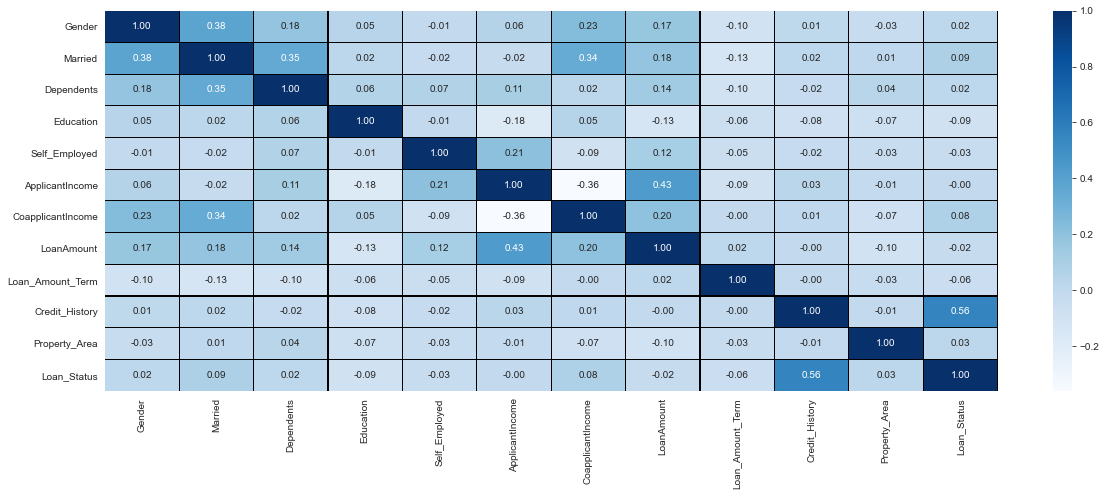

In [75]:
# Visualizing df_new_la.corr() using heatmap
plt.figure(figsize=(20,7))
sns.heatmap(df_new_la.corr(),cmap='Blues',annot=True,linewidths=0.1,linecolor="black",fmt=".2f")

From the above correlation heatmap, we see that `Credit_History` is highly positively correlated with our target variable `Loan_Status`. Also there is high positive correlation between `LoanAmount` & `ApplicantIncome`,`Gender` & `Married`, and `Dependents` & `Married`. 

There is very less correlation between `ApplicantIncome`,`LoanAmount`,`Loan_Amount_Term`,`Dependents` & `Gender` with our target variable `Loan_Status`.

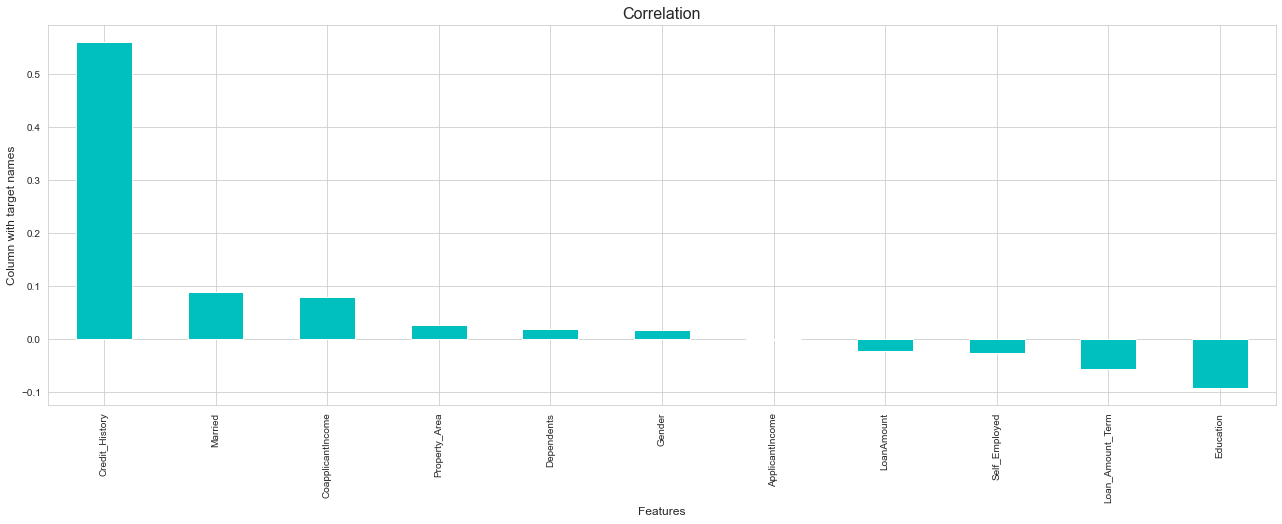

In [76]:
plt.figure(figsize=(22,7))
df_new_la.corr()['Loan_Status'].sort_values(ascending=False).drop(['Loan_Status']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=12)
plt.ylabel('Column with target names',fontsize=12)
plt.title('Correlation',fontsize=16)
plt.show()

# Model Building

In [77]:
x = df_new_la.drop("Loan_Status",axis=1)
y = df_new_la["Loan_Status"]

In [78]:
x.shape

(577, 11)

In [79]:
y.shape

(577,)

# VIF

In [80]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["Features"]=x.columns
vif["VIF"]=[variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif

,Features,VIF
0,Gender,1.218854
1,Married,1.431827
2,Dependents,1.183025
3,Education,1.060268
4,Self_Employed,1.055256
5,ApplicantIncome,1.763362
6,CoapplicantIncome,1.579512
7,LoanAmount,1.543185
8,Loan_Amount_Term,1.047798
9,Credit_History,1.008568


The Multi-collinearaity of all columns is good.

# Scaling

In [81]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
x = pd.DataFrame(scale.fit_transform(x), columns=x.columns)
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.477137,-1.362511,-0.809243,-0.541961,-0.380580,0.681780,-1.122446,0.000771,0.130788,0.418513,1.227472
1,0.477137,0.733939,0.902869,-0.541961,-0.380580,0.234783,0.744117,0.000771,0.130788,0.418513,-1.306522
2,0.477137,0.733939,-0.809243,-0.541961,2.627567,-0.527201,-1.122446,-1.437336,0.130788,0.418513,1.227472
3,0.477137,0.733939,-0.809243,1.845150,-0.380580,-0.791972,0.895786,-0.153545,0.130788,0.418513,1.227472
4,0.477137,-1.362511,-0.809243,-0.541961,-0.380580,0.728848,-1.122446,0.238260,0.130788,0.418513,1.227472
...,...,...,...,...,...,...,...,...,...,...,...
572,-2.095835,-1.362511,-0.809243,-0.541961,-0.380580,-0.587375,-1.122446,-1.293791,0.130788,0.418513,-1.306522
573,0.477137,0.733939,1.533596,-0.541961,-0.380580,0.035386,-1.122446,-2.332692,-2.562700,0.418513,-1.306522
574,0.477137,0.733939,0.902869,-0.541961,-0.380580,1.281658,0.173344,1.845015,0.130788,0.418513,1.227472
575,0.477137,0.733939,1.344671,-0.541961,-0.380580,1.164426,-1.122446,0.976055,0.130788,0.418513,1.227472


# SMOTE

In [82]:
y.value_counts()

1    398
0    179
Name: Loan_Status, dtype: int64

In [83]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
x , y = sm.fit_resample(x,y)

In [84]:
y.value_counts()

0    398
1    398
Name: Loan_Status, dtype: int64

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

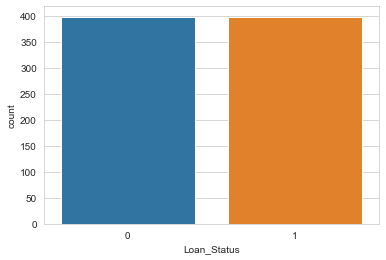

In [85]:
# Visualizing the data after oversampling
sns.countplot(y)

We have balanced the data using SMOTE.

# Best Random State

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

In [87]:
maxAccu=0
maxRS=0
for i in range(200):
    x_train,x_test,y_train,y_test=train_test_split(x, y, test_size = 0.30, random_state = i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    predrs=lr.predict(x_test)
    acc=accuracy_score(y_test,predrs)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is :",maxAccu," on Random State :",maxRS)

Best accuracy is : 0.8075313807531381  on Random State : 78


In [88]:
# dividing the dataset for training and testing with best random state
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=.30, random_state=maxRS)

In [89]:
x_train.shape

(557, 11)

In [90]:
y_train.shape

(557,)

In [91]:
x_test.shape

(239, 11)

In [92]:
y_test.shape

(239,)

In [93]:
# scaling the data using Standard Scaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

# Logistic Regression

In [94]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

In [95]:
lg=LogisticRegression()
lg.fit(x_train, y_train)
lg.score(x_train, y_train)
pred_lg=lg.predict(x_test)

print("accuracy score: ",accuracy_score(y_test,pred_lg))
print(confusion_matrix(y_test,pred_lg))
print(classification_report(y_test,pred_lg))

accuracy score:  0.8117154811715481
[[ 71  39]
 [  6 123]]
              precision    recall  f1-score   support

           0       0.92      0.65      0.76       110
           1       0.76      0.95      0.85       129

    accuracy                           0.81       239
   macro avg       0.84      0.80      0.80       239
weighted avg       0.83      0.81      0.81       239



# Decision Tree Classifier

In [96]:
from sklearn.tree import DecisionTreeClassifier

In [97]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
pred_dtc=dtc.predict(x_test)

print("accuracy score: ",accuracy_score(y_test,pred_dtc))
print(confusion_matrix(y_test,pred_dtc))
print(classification_report(y_test,pred_dtc))

accuracy score:  0.6903765690376569
[[100  10]
 [ 64  65]]
              precision    recall  f1-score   support

           0       0.61      0.91      0.73       110
           1       0.87      0.50      0.64       129

    accuracy                           0.69       239
   macro avg       0.74      0.71      0.68       239
weighted avg       0.75      0.69      0.68       239



# KNearest Neighbors Classifier

In [98]:
from sklearn.neighbors import KNeighborsClassifier

In [99]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
pred_knn=knn.predict(x_test)

print("accuracy score: ",accuracy_score(y_test,pred_knn))
print(confusion_matrix(y_test,pred_knn))
print(classification_report(y_test,pred_knn))

accuracy score:  0.7656903765690377
[[96 14]
 [42 87]]
              precision    recall  f1-score   support

           0       0.70      0.87      0.77       110
           1       0.86      0.67      0.76       129

    accuracy                           0.77       239
   macro avg       0.78      0.77      0.77       239
weighted avg       0.79      0.77      0.76       239



# GaussianNB Classifier

In [100]:
from sklearn.naive_bayes import GaussianNB

In [101]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
gnb.score(x_train,y_train)
pred_gnb=gnb.predict(x_test)

print("accuracy score: ",accuracy_score(y_test,pred_gnb))
print(confusion_matrix(y_test,pred_gnb))
print(classification_report(y_test,pred_gnb))

accuracy score:  0.7405857740585774
[[ 60  50]
 [ 12 117]]
              precision    recall  f1-score   support

           0       0.83      0.55      0.66       110
           1       0.70      0.91      0.79       129

    accuracy                           0.74       239
   macro avg       0.77      0.73      0.72       239
weighted avg       0.76      0.74      0.73       239



# Random Forest Classifier

In [102]:
from sklearn.ensemble import RandomForestClassifier

In [103]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
rfc.score(x_train,y_train)
pred_rfc=rfc.predict(x_test)

print("accuracy score: ",accuracy_score(y_test,pred_rfc))
print(confusion_matrix(y_test,pred_rfc))
print(classification_report(y_test,pred_rfc))

accuracy score:  0.803347280334728
[[96 14]
 [33 96]]
              precision    recall  f1-score   support

           0       0.74      0.87      0.80       110
           1       0.87      0.74      0.80       129

    accuracy                           0.80       239
   macro avg       0.81      0.81      0.80       239
weighted avg       0.81      0.80      0.80       239



# Support Vector Machine

In [104]:
from sklearn.svm import SVC

In [105]:
svc = SVC()
svc.fit(x_train, y_train)
svc.score(x_train, y_train)
svc_pred = svc.predict(x_test)
print("accuracy score: ",accuracy_score(y_test,svc_pred))
print(confusion_matrix(y_test,svc_pred))
print(classification_report(y_test,svc_pred))

accuracy score:  0.7698744769874477
[[ 80  30]
 [ 25 104]]
              precision    recall  f1-score   support

           0       0.76      0.73      0.74       110
           1       0.78      0.81      0.79       129

    accuracy                           0.77       239
   macro avg       0.77      0.77      0.77       239
weighted avg       0.77      0.77      0.77       239



# Gradient Boosting Classifier

In [106]:
from sklearn.ensemble import GradientBoostingClassifier

In [107]:
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
gbc.score(x_train,y_train)
pred_gcb=gbc.predict(x_test)

print("accuracy score: ",accuracy_score(y_test,pred_gcb))
print(confusion_matrix(y_test,pred_gcb))
print(classification_report(y_test,pred_gcb))

accuracy score:  0.6443514644351465
[[104   6]
 [ 79  50]]
              precision    recall  f1-score   support

           0       0.57      0.95      0.71       110
           1       0.89      0.39      0.54       129

    accuracy                           0.64       239
   macro avg       0.73      0.67      0.63       239
weighted avg       0.74      0.64      0.62       239



# XGB Classifier

In [108]:
from xgboost import XGBClassifier

In [109]:
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
xgb.score(x_train,y_train)
pred_xgb=xgb.predict(x_test)

print("accuracy score: ",accuracy_score(y_test,pred_xgb))
print(confusion_matrix(y_test,pred_xgb))
print(classification_report(y_test,pred_xgb))

accuracy score:  0.6903765690376569
[[103   7]
 [ 67  62]]
              precision    recall  f1-score   support

           0       0.61      0.94      0.74       110
           1       0.90      0.48      0.63       129

    accuracy                           0.69       239
   macro avg       0.75      0.71      0.68       239
weighted avg       0.76      0.69      0.68       239



From the above models, the highest accuracy score was achieved by `Logistic Regression`, followed by `Random Forest Classifier` & `SVC`.

The lowest accuracy scores among the models belongs to `Decision Tree Classifier` and `XGBoost Classifier`.

# Cross Validation Score

In [110]:
from sklearn.model_selection import cross_val_score

In [111]:
scr_lg=cross_val_score(lg,x,y,cv=5)
print("Cross validation score of this model is: ",scr_lg.mean())

Cross validation score of this model is:  0.7123349056603774


In [112]:
scr_dtc=cross_val_score(dtc,x,y,cv=5)
print("Cross validation score of this model is: ",scr_dtc.mean())

Cross validation score of this model is:  0.7613836477987421


In [113]:
scr_knn=cross_val_score(knn,x,y,cv=5)
print("Cross validation score of this model is: ",scr_knn.mean())

Cross validation score of this model is:  0.7299528301886792


In [114]:
scr_gnb=cross_val_score(gnb,x,y,cv=5)
print("Cross validation score of this model is: ",scr_gnb.mean())

Cross validation score of this model is:  0.706061320754717


In [115]:
scr_rfc=cross_val_score(rfc,x,y,cv=5)
print("Cross validation score of this model is: ",scr_rfc.mean())

Cross validation score of this model is:  0.8267295597484278


In [116]:
scr_svc=cross_val_score(svc,x,y,cv=5)
print("Cross validation score of this model is: ",scr_svc.mean())

Cross validation score of this model is:  0.7412342767295599


In [117]:
scr_gbc=cross_val_score(gbc,x,y,cv=5)
print("Cross validation score of this model is: ",scr_gbc.mean())

Cross validation score of this model is:  0.7815408805031447


In [118]:
scr_xgb=cross_val_score(xgb,x,y,cv=5)
print("Cross validation score of this model is: ",scr_xgb.mean())

Cross validation score of this model is:  0.8079009433962264


Among the cross validation scores the highest score belongs to `Random Forest Classifier`, followed by `XGB Classifier` & `Gradient Boosting Classifier`. Next in descending order, `Decision Tree Classifier`, `SVC`,`KNearest Neighbors Classifier`, `GaussianNB Classifier` & finally, `Logistic Regression model`.` 

# Hyper Parameter Tuning

Since the accuracy Score and the cross validation score of `Random Forest Classifier` model are the high, we shall consider this model for hyper parameter tuning.

We shall use GridSearchCV for Hyper Parameter Tuning.

In [119]:
from sklearn.model_selection import GridSearchCV

In [120]:
parameters={
    'bootstrap': [True, False],
    'max_depth': [10,20,30],
    'max_features': ['auto', 'sqrt'],
    'criterion':['gini','entropy'],
    'n_estimators': [100,200,300]}
grid_rfc = GridSearchCV(rfc, param_grid = parameters, scoring = 'accuracy', cv = 10)

In [121]:
grid_rfc.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 30],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [122]:
grid_rfc.best_params_

{'bootstrap': False,
 'criterion': 'entropy',
 'max_depth': 20,
 'max_features': 'sqrt',
 'n_estimators': 300}

In [123]:
rfc1=RandomForestClassifier(bootstrap=False,max_depth=20,max_features='sqrt',n_estimators=300,criterion='entropy')

rfc1.fit(x_train,y_train)
pred_rf1=rfc1.predict(x_test)
print("accuracy score: ",accuracy_score(y_test,pred_rf1))
print(confusion_matrix(y_test,pred_rf1))
print(classification_report(y_test,pred_rf1))

accuracy score:  0.7405857740585774
[[99 11]
 [51 78]]
              precision    recall  f1-score   support

           0       0.66      0.90      0.76       110
           1       0.88      0.60      0.72       129

    accuracy                           0.74       239
   macro avg       0.77      0.75      0.74       239
weighted avg       0.78      0.74      0.74       239



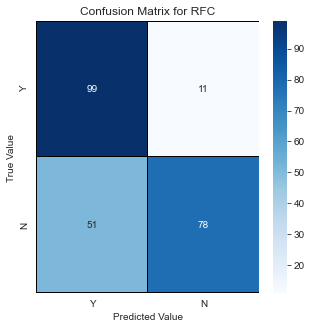

In [124]:
cm = confusion_matrix(y_test, pred_rf1)

x_axis_labels = ["Y","N"]
y_axis_labels = ["Y","N"]

f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Blues", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("Predicted Value")
plt.ylabel("True Value ")
plt.title('Confusion Matrix for RFC')
plt.show()

# ROC-AUC Curve

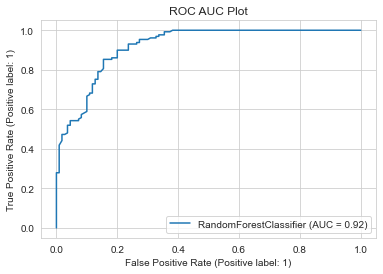

In [125]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(rfc1,x_test,y_test)
plt.title("ROC AUC Plot")
plt.show()

From the ROC-AUC plot we get the AUC score to be 92 %.

# Saving the Model

In [126]:
import joblib
joblib.dump(rfc1,"Loan_Appln_Status_Predn.pkl")

['Loan_Appln_Status_Predn.pkl']

# Prediction

In [127]:
# Loading the saved model
model=joblib.load("Loan_Appln_Status_Predn.pkl")

# Prediction
prediction = model.predict(x_test)
prediction

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0])

In [128]:
pd.DataFrame([model.predict(x_test)[:],y_test[:]],index=["Predicted Value","Actual Value"])

,0,1,2,3,4,5,6,7,8,9,...,229,230,231,232,233,234,235,236,237,238
Predicted Value,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
Actual Value,1,0,1,0,1,1,1,0,0,0,...,1,1,1,1,0,1,0,0,0,0


The above shows the predicted values and the actual values.They are almost similar.